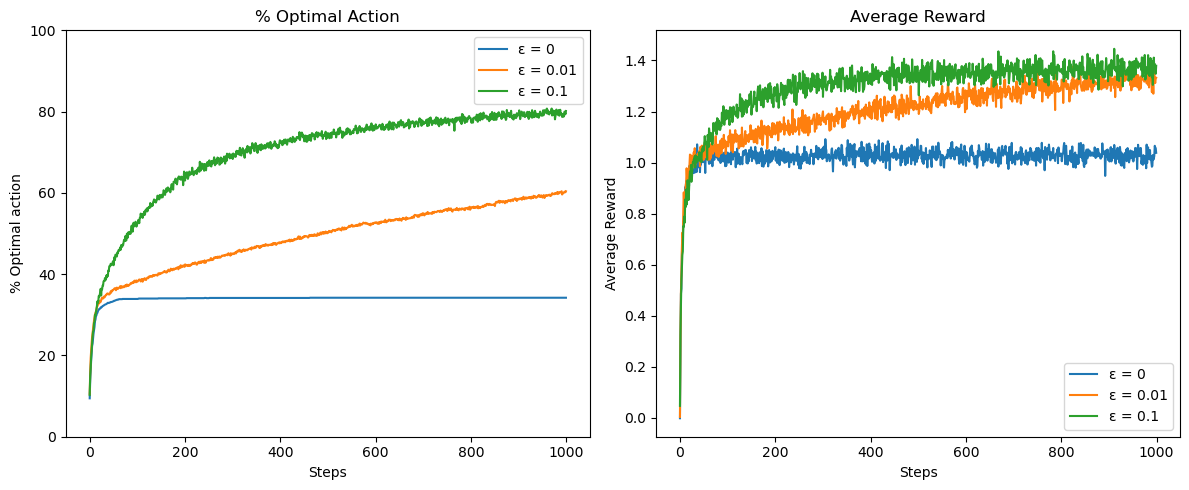

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def run_bandit(epsilons, n_arms=10, n_steps=1000, n_runs=2000):
    """
    Runs an experiment for different ε (epsilon) values
    (n_runs simulations × n_steps plays) and keeps track of
    the % of optimal actions and average rewards to return them.
    """
    # Stuff to store results (2D arrays for each epsilon)
    all_optimal_action = np.zeros((len(epsilons), n_steps))
    all_avg_rewards = np.zeros((len(epsilons), n_steps))
    
    for e_idx, epsilon in enumerate(epsilons):
        # Arrays to average out the optimal action % and rewards over runs
        optimal_action_counts = np.zeros(n_steps)
        reward_sums = np.zeros(n_steps)
        
        for _ in range(n_runs):
            # 1) Setting up the real bandit (slot machine) environment
            # Picking the true reward means for each bandit from N(0,1)
            true_values = np.random.normal(0, 1, n_arms)
            # The index of the arm with the highest mean reward (best choice)
            best_arm = np.argmax(true_values)
            
            # 2) Q estimates (start at 0) & how many times we picked each arm
            Q_estimates = np.zeros(n_arms)
            action_counts = np.zeros(n_arms)  # counting picks per arm
            
            for step in range(n_steps):
                # 3) Picking an action with ε-greedy method
                if np.random.rand() < epsilon:
                    # Random exploring
                    action = np.random.randint(n_arms)
                else:
                    # Go with the arm that’s got the best Q so far
                    action = np.argmax(Q_estimates)
                
                # 4) Sampling the actual reward (normal dist: mean=true_values[action], std=1)
                reward = np.random.normal(true_values[action], 1)
                
                # 5) Checking if we picked the best arm
                if action == best_arm:
                    optimal_action_counts[step] += 1
                
                # 6) Updating the reward stuff
                action_counts[action] += 1
                # Incremental sample average thing
                Q_estimates[action] += (reward - Q_estimates[action]) / action_counts[action]
                
                # 7) Keeping track of average rewards (adding up rewards per step across runs)
                reward_sums[step] += reward
        
        # After running n_runs times, average it out
        all_optimal_action[e_idx, :] = (optimal_action_counts / n_runs) * 100.0
        all_avg_rewards[e_idx, :] = reward_sums / n_runs
    
    return all_optimal_action, all_avg_rewards

def plot_results(epsilons, optimal_action, avg_rewards):
    """
    Draws some graphs for % optimal action and average reward based on the experiment.
    """
    plt.figure(figsize=(12, 5))
    
    # ----- (1) % Optimal Action graph -----
    plt.subplot(1, 2, 1)
    for i, eps in enumerate(epsilons):
        plt.plot(optimal_action[i], label=f'ε = {eps}')
    plt.xlabel('Steps')
    plt.ylabel('% Optimal action')
    plt.ylim(0, 100)
    plt.legend()
    plt.title('% Optimal Action')
    
    # ----- (2) Average Reward graph -----
    plt.subplot(1, 2, 2)
    for i, eps in enumerate(epsilons):
        plt.plot(avg_rewards[i], label=f'ε = {eps}')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('Average Reward')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Setting up experiment parameters
    epsilons = [0, 0.01, 0.1]
    n_arms = 10
    n_steps = 1000
    n_runs = 2000
    
    # Running the simulation
    optimal_action, avg_rewards = run_bandit(epsilons, n_arms, n_steps, n_runs)
    
    # Showing the results
    plot_results(epsilons, optimal_action, avg_rewards)